In [105]:
import gtsam
import numpy as np
import graphviz
from gtsam.utils import plot as gtsam_plot

In [106]:
graph = gtsam.NonlinearFactorGraph()
values = gtsam.Values()

# Add Prior factors
graph.add(
    gtsam.PriorFactorPose2(
        gtsam.symbol("a", 1),
        gtsam.Pose2(0, 0, 0),
        gtsam.noiseModel.Diagonal.Sigmas(np.array([1e-9, 1e-9, 1e-9])),
    )
)
values.insert(gtsam.symbol("a", 1), gtsam.Pose2(0, 0, 0))

graph.add(
    gtsam.BetweenFactorPose2(
        gtsam.symbol("a", 1),
        gtsam.symbol("a", 2),
        gtsam.Pose2(2, 0, 0),
        gtsam.noiseModel.Diagonal.Sigmas(np.array([0.2, 0.2, 0.1])),
    )
)
values.insert(gtsam.symbol("a", 2), gtsam.Pose2(2, 0, 0))
graph.add(
    gtsam.BetweenFactorPose2(
        gtsam.symbol("a", 2),
        gtsam.symbol("a", 3),
        gtsam.Pose2(2, 0, 0),
        gtsam.noiseModel.Diagonal.Sigmas(np.array([0.2, 0.2, 0.1])),
    )
)
values.insert(gtsam.symbol("a", 3), gtsam.Pose2(0, 0, 0))


# graph.add(
#     gtsam.BetweenFactorPose2(
#         gtsam.symbol("a", 1),
#         gtsam.symbol("a", 3),
#         gtsam.Pose2(3.9, 0, 0),
#         gtsam.noiseModel.Diagonal.Sigmas(np.array([0.2, 0.2, 0.1])),
#     )
# )

In [107]:
values.insert(gtsam.symbol("b", 1), gtsam.Pose2(0, 0, 0))

graph.add(
    gtsam.BetweenFactorPose2(
        gtsam.symbol("b", 1),
        gtsam.symbol("b", 2),
        gtsam.Pose2(2, 0, 0),
        gtsam.noiseModel.Diagonal.Sigmas(np.array([0.2, 0.2, 0.1])),
    )
)
values.insert(gtsam.symbol("b", 2), gtsam.Pose2(2, 0, 0))
graph.add(
    gtsam.BetweenFactorPose2(
        gtsam.symbol("b", 2),
        gtsam.symbol("b", 3),
        gtsam.Pose2(2, 0, 0),
        gtsam.noiseModel.Diagonal.Sigmas(np.array([0.2, 0.2, 0.1])),
    )
)
values.insert(gtsam.symbol("b", 3), gtsam.Pose2(0, 0, 0))


# graph.add(
#     gtsam.BetweenFactorPose2(
#         gtsam.symbol("b", 1),
#         gtsam.symbol("b", 3),
#         gtsam.Pose2(3.9, 0, 0),
#         gtsam.noiseModel.Diagonal.Sigmas(np.array([0.2, 0.2, 0.1])),
#     )
# )

In [108]:
# values.insert(gtsam.symbol("c", 1), gtsam.Pose2(10, 0, 0))

# graph.add(
#     gtsam.BetweenFactorPose2(
#         gtsam.symbol("c", 1),
#         gtsam.symbol("c", 2),
#         gtsam.Pose2(4, 0, 0),
#         gtsam.noiseModel.Diagonal.Sigmas(np.array([0.2, 0.2, 0.1])),
#     )
# )
# values.insert(gtsam.symbol("c", 2), gtsam.Pose2(2, 0, 0))
# graph.add(
#     gtsam.BetweenFactorPose2(
#         gtsam.symbol("c", 2),
#         gtsam.symbol("c", 3),
#         gtsam.Pose2(2, 0, 0),
#         gtsam.noiseModel.Diagonal.Sigmas(np.array([0.2, 0.2, 0.1])),
#     )
# )
# values.insert(gtsam.symbol("c", 3), gtsam.Pose2(0, 0, 0))

In [109]:
graph.add(
    gtsam.BetweenFactorPose2(
        gtsam.symbol("a", 1),
        gtsam.symbol("b", 1),
        gtsam.Pose2(0, 10, 0),
        gtsam.noiseModel.Diagonal.Sigmas(np.array([0.1, 0.1, 0.1])),
    )
)


# graph.add(
#     gtsam.BetweenFactorPose2(
#         gtsam.symbol("a", 2),
#         gtsam.symbol("c", 2),
#         gtsam.Pose2(10, 0, 0),
#         gtsam.noiseModel.Diagonal.Sigmas(np.array([0.1, 0.1, 0.1])),
#     )
# )

In [110]:
# graph.saveGraph("s.dot" , values)

In [111]:


# # Example: Assume 'graph.dot' is your saved graph in DOT format
# dot_filename = '/media/baymax/1A52-86C0/new/detected_loops/s.dot'

# # Create a Graphviz object from the DOT file
# graph = graphviz.Source.from_file(dot_filename)

# # Display the graph
# graph.view()

In [112]:
#set inliers
InlierVector = gtsam.KeyVector()
InlierVector.append(0)
InlierVector.append(1)
InlierVector.append(2)
InlierVector.append(3)
InlierVector.append(4)


In [113]:
# # optimizer
# params = gtsam.LevenbergMarquardtParams()
paramgauss = gtsam.GaussNewtonParams()
paramgauss.setVerbosity('SUMMARY')
params = gtsam.GncGaussNewtonParams(paramgauss)
# params.setVerbosityGNC("ERROR")
# params.setlambdaUpperBound(1e10)
# params.setlambdaInitial(1e-5)
# params.setRelativeErrorTol(1e-1)
# params.setAbsoluteErrorTol(1e-5)
# params.setMaxIterations(10000)
# params.setVerbosity('ERROR')
# Gncparams = gtsam.GncLMParams()
# params.setKnownInliers(InlierVector)
optimizer = gtsam.GncGaussNewtonOptimizer(graph, values, params)
# optimizer = gtsam.LevenbergMarquardtOptimizer(graph, values)
result = optimizer.optimize()

In [114]:
dir(gtsam)

['AHRSFactor',
 'AcceleratingScenario',
 'BearingFactor2D',
 'BearingFactor3D',
 'BearingFactorPose2',
 'BearingRange2D',
 'BearingRange3D',
 'BearingRangeFactor2D',
 'BearingRangeFactor3D',
 'BearingRangeFactorPose2',
 'BearingRangeFactorPose3',
 'BearingRangePose2',
 'BearingRangePose3',
 'BetweenFactorConstantBias',
 'BetweenFactorDouble',
 'BetweenFactorPoint2',
 'BetweenFactorPoint3',
 'BetweenFactorPose2',
 'BetweenFactorPose2s',
 'BetweenFactorPose3',
 'BetweenFactorPose3s',
 'BetweenFactorRot2',
 'BetweenFactorRot3',
 'BetweenFactorSO3',
 'BetweenFactorSO4',
 'BetweenFactorVector',
 'BinaryMeasurementPoint3',
 'BinaryMeasurementRot3',
 'BinaryMeasurementUnit3',
 'BinaryMeasurementsPoint3',
 'BinaryMeasurementsRot3',
 'BinaryMeasurementsUnit3',
 'BlockJacobiPreconditionerParameters',
 'Cal3Bundler',
 'Cal3DS2',
 'Cal3DS2_Base',
 'Cal3Fisheye',
 'Cal3Unified',
 'Cal3_S2',
 'Cal3_S2Stereo',
 'CalibratedCamera',
 'CameraSetCal3Bundler',
 'CameraSetCal3DS2',
 'CameraSetCal3Fisheye',

In [115]:
print(result)

Values with 6 values:
Value a1: (gtsam::Pose2)
(2.73691e-48, -8.75812e-47, -2.18953e-47)

Value a2: (gtsam::Pose2)
(2, -1.75162e-46, -2.18953e-47)

Value a3: (gtsam::Pose2)
(4, -2.18953e-46, -2.18953e-47)

Value b1: (gtsam::Pose2)
(4.05524e-30, 10, 0)

Value b2: (gtsam::Pose2)
(2, 10, 2.95823e-31)

Value b3: (gtsam::Pose2)
(4, 10, 3.69779e-31)




In [116]:
for key in result.keys():
    print('a',key - gtsam.symbol('a',0))
    print('b',key - gtsam.symbol('b',0))
    print(result.atPose2(key))

a 1
b -72057594037927935
(2.73691e-48, -8.75812e-47, -2.18953e-47)

a 2
b -72057594037927934
(2, -1.75162e-46, -2.18953e-47)

a 3
b -72057594037927933
(4, -2.18953e-46, -2.18953e-47)

a 72057594037927937
b 1
(4.05524e-30, 10, 0)

a 72057594037927938
b 2
(2, 10, 2.95823e-31)

a 72057594037927939
b 3
(4, 10, 3.69779e-31)



In [117]:
import open3d as o3d
import numpy as np

# Define your points
points = np.array([[1.0, 0.0, 0.0],
                   [0.0, 1.0, 0.0],
                   [0.0, 0.0, 1.0]])

# Define a complex transformation matrix
rotation_matrix = np.array([[0.866, -0.5, 0.0],
                            [0.5, 0.866, 0.0],
                            [0.0, 0.0, 1.0]])

translation_vector = np.array([1.0, 2.0, 3.0])

scaling_factors = np.array([2.0, 2.0, 2.0])

transformation_matrix = np.eye(4)
transformation_matrix[:3, :3] = rotation_matrix
transformation_matrix[:3, 3] = translation_vector
transformation_matrix[:3, :3] *= scaling_factors

# Transform the points using Open3D
point_cloud = o3d.geometry.PointCloud()
point_cloud.points = o3d.utility.Vector3dVector(points)
point_cloud.transform(transformation_matrix)
transformed_points_open3d = np.asarray(point_cloud.points)

# Transform the points using your external explicit transformation
transformed_points_external = np.dot(transformation_matrix[:3, :3], points.T).T + transformation_matrix[:3, 3]

# Compare the results
tolerance = 1e-6
if np.allclose(transformed_points_open3d, transformed_points_external, atol=tolerance):
    print("Transformations are the same.")
else:
    print("Transformations are not the same.")


Transformations are the same.


In [118]:
dir(params)

['Verbosity',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'baseOptimizerParams',
 'knownInliers',
 'knownOutliers',
 'lossType',
 'maxIterations',
 'muStep',
 'print',
 'relativeCostTol',
 'setKnownInliers',
 'setKnownOutliers',
 'setLossType',
 'setMaxIterations',
 'setMuStep',
 'setRelativeCostTol',
 'setVerbosityGNC',
 'setWeightsTol',
 'verbosity',
 'weightsTol']

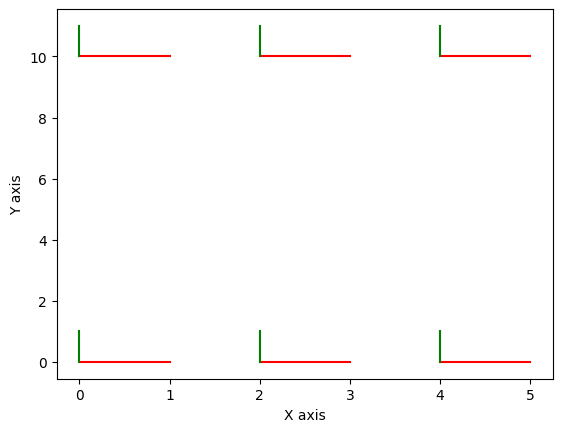

In [119]:
for key in result.keys():
    gtsam_plot.plot_pose2(0, result.atPose2(key), 1.0)

In [120]:
dir(gtsam_plot)

['Axes3D',
 'Iterable',
 'Marginals',
 'Optional',
 'Point2',
 'Point3',
 'Pose2',
 'Pose3',
 'Tuple',
 'Values',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ellipsoid',
 'gtsam',
 'np',
 'patches',
 'plot_3d_points',
 'plot_covariance_ellipse_2d',
 'plot_covariance_ellipse_3d',
 'plot_incremental_trajectory',
 'plot_point2',
 'plot_point2_on_axes',
 'plot_point3',
 'plot_point3_on_axes',
 'plot_pose2',
 'plot_pose2_on_axes',
 'plot_pose3',
 'plot_pose3_on_axes',
 'plot_trajectory',
 'plt',
 'set_axes_equal']

In [121]:
graph.saveGraph("gnc.dot" , values)
#save to pdf usning graph viz
graphviz.Source.from_file("gnc.dot").render("gnc", format="pdf")

'gnc.pdf'